In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("data/Coupang-reviews-homeplanet/review_data_non_text.csv")

In [6]:
df

,상품명,구매상품명,작성일자,구매자명,평점,헤드라인,리뷰내용,도움수,이미지수
0,"홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개","홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개",2025.06.04,아아잉,5,NaN,NaN,0,0
1,"홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개","홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 2개",2025.06.03,정*준,5,NaN,NaN,0,0
2,"홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개","홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개",2025.06.03,백경민,5,NaN,NaN,0,0
3,"홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개","홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개",2025.06.03,백*수,3,NaN,NaN,0,0
4,"홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개","홈플래닛 10W USB-A 2포트 멀티 충전기 (5V 2A), 화이트, 1개",2025.06.03,이*유,5,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...
60269,"홈플래닛 유청분리 그릭요거트 메이커 1.2L, 화이트, 1개","홈플래닛 유청분리 그릭요거트 메이커 1.2L, 화이트, 1개",2025.01.26,정*희,5,NaN,NaN,0,0
60270,"홈플래닛 유청분리 그릭요거트 메이커 1.2L, 화이트, 1개","홈플래닛 유청분리 그릭요거트 메이커 1.2L, 화이트, 1개",2025.01.26,김*자,5,NaN,NaN,0,0
60271,"홈플래닛 유청분리 그릭요거트 메이커 1.2L, 화이트, 1개","홈플래닛 유청분리 그릭요거트 메이커 1.2L, 화이트, 1개",2025.01.26,김*록,5,NaN,NaN,0,0
60272,"홈플래닛 유청분리 그릭요거트 메이커 1.2L, 화이트, 1개","홈플래닛 유청분리 그릭요거트 메이커 1.2L, 화이트, 1개",2025.01.26,조*숙,5,NaN,NaN,0,0


In [7]:
!pip install scikit-learn --quiet

In [8]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# 데이터프레임에서 평점 도움수 이미지수 컬럼을 선택하여 스케일링
scaler = StandardScaler()
X = df[['평점', '도움수', '이미지수']]
X_train_scaled = scaler.fit_transform(X)

print("데이터 형태 : ", X_train_scaled)

데이터 형태 :  [[ 0.37878174 -0.01781602 -0.06104299]
 [ 0.37878174 -0.01781602 -0.06104299]
 [ 0.37878174 -0.01781602 -0.06104299]
 ...
 [ 0.37878174 -0.01781602 -0.06104299]
 [ 0.37878174 -0.01781602 -0.06104299]
 [ 0.37878174 -0.01781602 -0.06104299]]


In [9]:
results = []

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')

k_range = range(2, 11)
init_methods = ['k-means++', 'random']

for init_method in init_methods:
    for n_clusters in k_range:
        kmeans = KMeans(n_clusters=n_clusters, init=init_method, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(X_train_scaled)

        # 실루엣 스코어 계산
        silhouette_avg = silhouette_score(X_train_scaled, cluster_labels)

        results.append({
            'Algorithm': 'K-Means',
            'n_clusters': n_clusters,
            'init': init_method,
            'eps': np.nan,
            'min_samples': np.nan,
            'linkage': np.nan,
            'silhouette_score': silhouette_avg
        })

        print(f"K-Means (init={init_method}, n_clusters={n_clusters}): 실루엣 스코어 = {silhouette_avg:.4f}")

K-Means (init=k-means++, n_clusters=2): 실루엣 스코어 = 0.9723
K-Means (init=k-means++, n_clusters=3): 실루엣 스코어 = 0.9046
K-Means (init=k-means++, n_clusters=4): 실루엣 스코어 = 0.9051
K-Means (init=k-means++, n_clusters=5): 실루엣 스코어 = 0.9366
K-Means (init=k-means++, n_clusters=6): 실루엣 스코어 = 0.9585
K-Means (init=k-means++, n_clusters=7): 실루엣 스코어 = 0.9614
K-Means (init=k-means++, n_clusters=8): 실루엣 스코어 = 0.9816
K-Means (init=k-means++, n_clusters=9): 실루엣 스코어 = 0.9842
K-Means (init=k-means++, n_clusters=10): 실루엣 스코어 = 0.9844
K-Means (init=random, n_clusters=2): 실루엣 스코어 = 0.9702
K-Means (init=random, n_clusters=3): 실루엣 스코어 = 0.9625
K-Means (init=random, n_clusters=4): 실루엣 스코어 = 0.8659
K-Means (init=random, n_clusters=5): 실루엣 스코어 = 0.9053
K-Means (init=random, n_clusters=6): 실루엣 스코어 = 0.9561
K-Means (init=random, n_clusters=7): 실루엣 스코어 = 0.9561
K-Means (init=random, n_clusters=8): 실루엣 스코어 = 0.9560
K-Means (init=random, n_clusters=9): 실루엣 스코어 = 0.9561
K-Means (init=random, n_clusters=10): 실루엣 스코어 = 0.9585

In [14]:
from sklearn.cluster import AgglomerativeClustering

linkage_methods = ['ward', 'complete', 'average', 'single']

for linkage_method in linkage_methods:
    for n_clusters in k_range:
        try:
            agg = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
            cluster_labels = agg.fit_predict(X_train_scaled)

            # 실루엣 스코어 계산
            silhouette_avg = silhouette_score(X_train_scaled, cluster_labels)

            results.append({
                'Algorithm': 'Agglomerative',
                'n_clusters': n_clusters,
                'init': np.nan,
                'eps': np.nan,
                'min_samples': np.nan,
                'linkage': linkage_method,
                'silhouette_score': silhouette_avg
            })

            print(f"Agglomerative (linkage={linkage_method}, n_clusters={n_clusters}): 실루엣 스코어 = {silhouette_avg:.4f}")
        except:
            print(f"Agglomerative (linkage={linkage_method}, n_clusters={n_clusters}): 실행 불가")

Agglomerative (linkage=ward, n_clusters=2): 실루엣 스코어 = 0.9672
Agglomerative (linkage=ward, n_clusters=3): 실루엣 스코어 = 0.9058
Agglomerative (linkage=ward, n_clusters=4): 실루엣 스코어 = 0.9061
Agglomerative (linkage=ward, n_clusters=5): 실루엣 스코어 = 0.9066
Agglomerative (linkage=ward, n_clusters=6): 실루엣 스코어 = 0.9384
Agglomerative (linkage=ward, n_clusters=7): 실루엣 스코어 = 0.9384
Agglomerative (linkage=ward, n_clusters=8): 실루엣 스코어 = 0.9782
Agglomerative (linkage=ward, n_clusters=9): 실루엣 스코어 = 0.9784
Agglomerative (linkage=ward, n_clusters=10): 실루엣 스코어 = 0.9885
Agglomerative (linkage=complete, n_clusters=2): 실루엣 스코어 = 0.9918
Agglomerative (linkage=complete, n_clusters=3): 실루엣 스코어 = 0.9823
Agglomerative (linkage=complete, n_clusters=4): 실루엣 스코어 = 0.9823
Agglomerative (linkage=complete, n_clusters=5): 실루엣 스코어 = 0.9792
Agglomerative (linkage=complete, n_clusters=6): 실루엣 스코어 = 0.9658
Agglomerative (linkage=complete, n_clusters=7): 실루엣 스코어 = 0.9659
Agglomerative (linkage=complete, n_clusters=8): 실루엣 스코어 = 0.

In [15]:
from sklearn.cluster import DBSCAN

eps_values = [0.3, 0.5, 0.7, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
min_samples_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(X_train_scaled)

        # 노이즈 포인트(-1)가 아닌 클러스터가 2개 이상인 경우만 평가
        n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
        n_noise = list(cluster_labels).count(-1)

        if n_clusters >= 2:
            try:
                silhouette_avg = silhouette_score(X_train_scaled, cluster_labels)

                results.append({
                    'Algorithm': 'DBSCAN',
                    'n_clusters': n_clusters,
                    'init': np.nan,
                    'eps': eps,
                    'min_samples': min_samples,
                    'linkage': np.nan,
                    'silhouette_score': silhouette_avg
                })

                print(f"DBSCAN (eps={eps}, min_samples={min_samples}): 클러스터 수={n_clusters}, 노이즈={n_noise}, 실루엣 스코어={silhouette_avg:.4f}")
            except:
                print(f"DBSCAN (eps={eps}, min_samples={min_samples}): 실루엣 스코어 계산 불가")
        else:
            print(f"DBSCAN (eps={eps}, min_samples={min_samples}): 클러스터 수 부족 (클러스터 수={n_clusters})")

DBSCAN (eps=0.3, min_samples=2): 클러스터 수=30, 노이즈=21, 실루엣 스코어=0.9994
DBSCAN (eps=0.3, min_samples=3): 클러스터 수=27, 노이즈=27, 실루엣 스코어=0.9993
DBSCAN (eps=0.3, min_samples=4): 클러스터 수=25, 노이즈=33, 실루엣 스코어=0.9991
DBSCAN (eps=0.3, min_samples=5): 클러스터 수=22, 노이즈=45, 실루엣 스코어=0.9987
DBSCAN (eps=0.3, min_samples=6): 클러스터 수=20, 노이즈=55, 실루엣 스코어=0.9987
DBSCAN (eps=0.3, min_samples=7): 클러스터 수=18, 노이즈=67, 실루엣 스코어=0.9983
DBSCAN (eps=0.3, min_samples=8): 클러스터 수=15, 노이즈=88, 실루엣 스코어=0.9976
DBSCAN (eps=0.3, min_samples=9): 클러스터 수=15, 노이즈=88, 실루엣 스코어=0.9976
DBSCAN (eps=0.3, min_samples=10): 클러스터 수=14, 노이즈=97, 실루엣 스코어=0.9974
DBSCAN (eps=0.5, min_samples=2): 클러스터 수=30, 노이즈=21, 실루엣 스코어=0.9994
DBSCAN (eps=0.5, min_samples=3): 클러스터 수=27, 노이즈=27, 실루엣 스코어=0.9993
DBSCAN (eps=0.5, min_samples=4): 클러스터 수=25, 노이즈=33, 실루엣 스코어=0.9991
DBSCAN (eps=0.5, min_samples=5): 클러스터 수=22, 노이즈=45, 실루엣 스코어=0.9987
DBSCAN (eps=0.5, min_samples=6): 클러스터 수=20, 노이즈=55, 실루엣 스코어=0.9987
DBSCAN (eps=0.5, min_samples=7): 클러스터 수=18, 노이즈=67, 실루엣 스코어=0

In [16]:
results_df = pd.DataFrame(results) # 결과 데이터프레임화
results_df

,Algorithm,n_clusters,init,eps,min_samples,linkage,silhouette_score
0,K-Means,2,k-means++,NaN,NaN,NaN,0.972257
1,K-Means,3,k-means++,NaN,NaN,NaN,0.904618
2,K-Means,4,k-means++,NaN,NaN,NaN,0.905122
3,K-Means,5,k-means++,NaN,NaN,NaN,0.936554
4,K-Means,6,k-means++,NaN,NaN,NaN,0.958523
...,...,...,...,...,...,...,...
128,DBSCAN,7,NaN,5.0,2.0,NaN,0.960821
129,DBSCAN,5,NaN,5.0,3.0,NaN,0.960778
130,DBSCAN,4,NaN,5.0,4.0,NaN,0.969382
131,DBSCAN,4,NaN,5.0,5.0,NaN,0.969382


In [17]:
print("알고리즘별 최고 실루엣 스코어:")
best_by_algorithm = results_df.groupby('Algorithm')['silhouette_score'].max().sort_values(ascending=False)
print(best_by_algorithm)

알고리즘별 최고 실루엣 스코어:
Algorithm
DBSCAN           0.999395
Agglomerative    0.992931
K-Means          0.984404
Name: silhouette_score, dtype: float64


In [18]:
print("\n전체 최고 성능:")
best_overall = results_df.loc[results_df['silhouette_score'].idxmax()]
print(f"알고리즘: {best_overall['Algorithm']}")
print(f"실루엣 스코어: {best_overall['silhouette_score']:.4f}")
if best_overall['Algorithm'] == 'K-Means':
    print(f"하이퍼파라미터: n_clusters={best_overall['n_clusters']}, init={best_overall['init']}")
elif best_overall['Algorithm'] == 'Agglomerative':
    print(f"하이퍼파라미터: n_clusters={best_overall['n_clusters']}, linkage={best_overall['linkage']}")
elif best_overall['Algorithm'] == 'DBSCAN':
    print(f"하이퍼파라미터: eps={best_overall['eps']}, min_samples={best_overall['min_samples']}")

# 상위 10개 결과 출력
print("\n상위 10개 결과:")
top_10 = results_df.nlargest(10, 'silhouette_score')
print(top_10[['Algorithm', 'n_clusters', 'init', 'eps', 'min_samples', 'linkage', 'silhouette_score']])


전체 최고 성능:
알고리즘: DBSCAN
실루엣 스코어: 0.9994
하이퍼파라미터: eps=0.3, min_samples=2.0

상위 10개 결과:
   Algorithm  n_clusters init  eps  min_samples linkage  silhouette_score
54    DBSCAN          30  NaN  0.3          2.0     NaN          0.999395
63    DBSCAN          30  NaN  0.5          2.0     NaN          0.999395
72    DBSCAN          30  NaN  0.7          2.0     NaN          0.999395
81    DBSCAN          30  NaN  1.0          2.0     NaN          0.999395
90    DBSCAN          30  NaN  1.5          2.0     NaN          0.999395
55    DBSCAN          27  NaN  0.3          3.0     NaN          0.999254
64    DBSCAN          27  NaN  0.5          3.0     NaN          0.999254
73    DBSCAN          27  NaN  0.7          3.0     NaN          0.999254
82    DBSCAN          27  NaN  1.0          3.0     NaN          0.999254
91    DBSCAN          27  NaN  1.5          3.0     NaN          0.999254


In [ ]:
# Kmeans 클러스터링 결과 k=10, init='k-means++' 의 경우로 클러스터링 실행
kmeans_best = KMeans(n_clusters=10, init='k-means++', random_state=42, n_init=10)
kmeans_best.fit(X_train_scaled)
# 클러스터 레이블 할당
assignments_X_train_best = kmeans_best.labels_
# 클러스터 중심점
cluster_centers_best = kmeans_best.cluster_centers_

#클러스터링 레이블을 데이터프레임에 추가
df['Cluster'] = assignments_X_train_best
# 클러스터링 결과를 CSV 파일로 저장
df.to_csv('data/Coupang-reviews-homeplanet/review_data_non_text_clustered.csv', index=False)


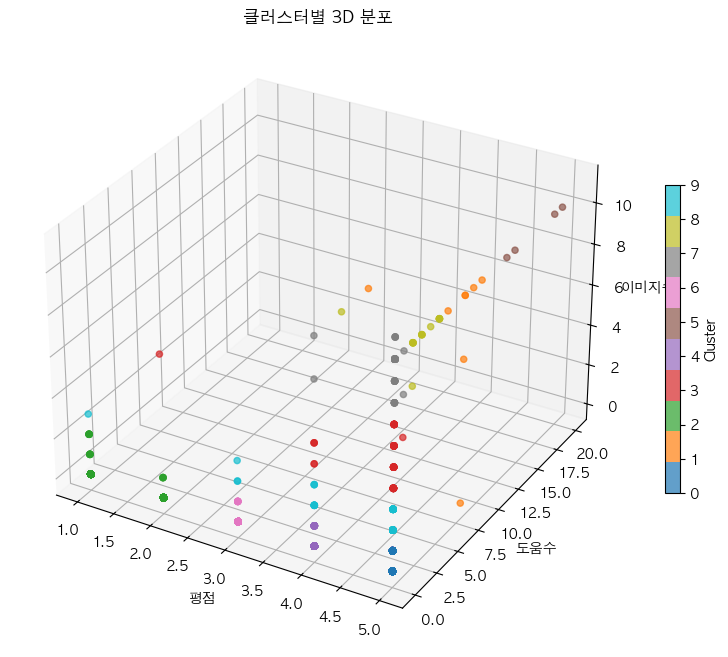

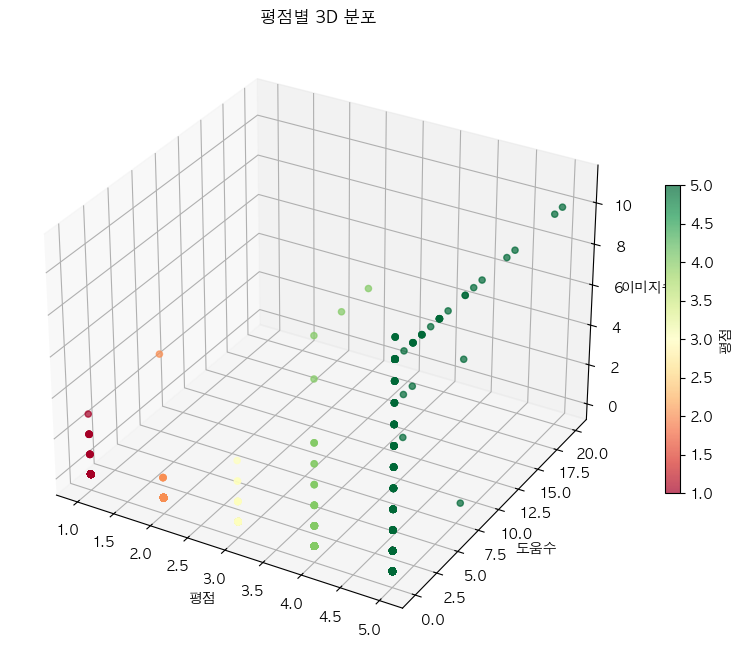

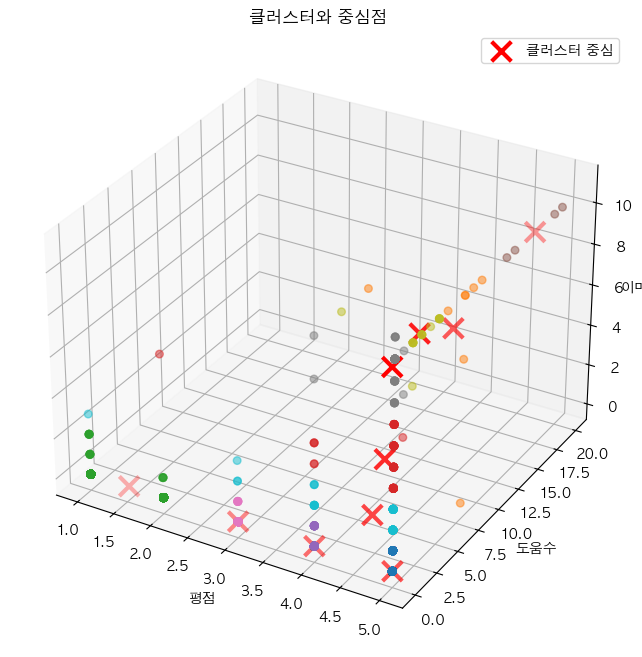

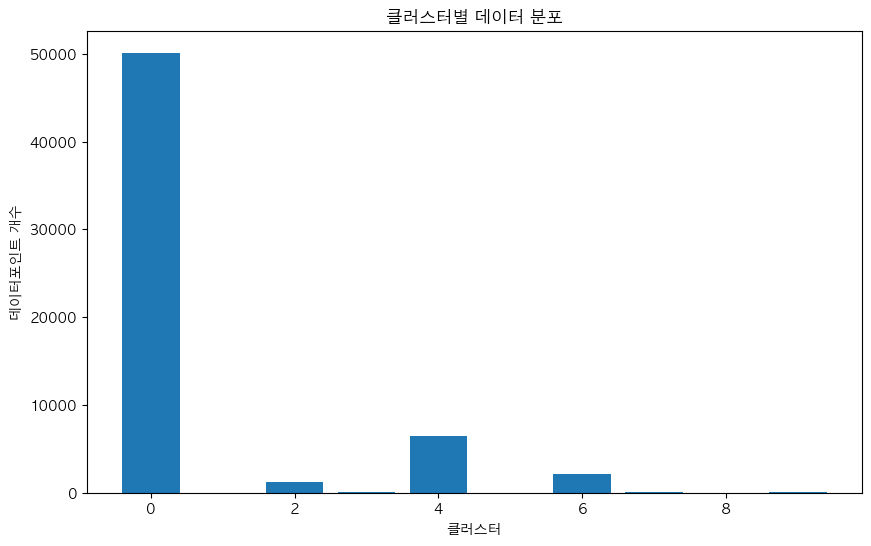

=== 클러스터별 평균값 ===
           평점    도움수   이미지수
Cluster                    
0        5.00   0.00   0.00
1        4.88   7.88   8.38
2        1.53   0.00   0.02
3        4.89   0.01   5.24
4        4.00   0.00   0.00
5        5.00  16.50  10.00
6        3.00   0.00   0.00
7        4.96   0.04   9.59
8        4.94   3.29   9.88
9        4.74   0.00   2.42

=== 클러스터별 데이터 개수 ===
Cluster
0    50126
1        8
2     1230
3       71
4     6517
5        4
6     2168
7       56
8       17
9       77
Name: count, dtype: int64

총 데이터포인트: 60274
클러스터 개수: 10

이미지 저장 완료: img/ 디렉토리


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import os

plt.rcParams['font.family'] = 'AppleGothic'  # macOS

# img 디렉토리 생성
os.makedirs('img', exist_ok=True)

# 데이터 로드
df = pd.read_csv('data/Coupang-reviews-homeplanet/review_data_non_text_clustered.csv')

# 1. 클러스터별 3D 분포
fig1 = plt.figure(figsize=(10, 8))
ax1 = fig1.add_subplot(111, projection='3d')
scatter1 = ax1.scatter(df['평점'], df['도움수'], df['이미지수'],
                      c=df['Cluster'], cmap='tab10', alpha=0.7)
ax1.set_xlabel('평점')
ax1.set_ylabel('도움수')
ax1.set_zlabel('이미지수')
ax1.set_title('클러스터별 3D 분포')
plt.colorbar(scatter1, ax=ax1, shrink=0.5, label='Cluster')
plt.savefig('img/cluster_3d_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. 평점별 3D 분포
fig2 = plt.figure(figsize=(10, 8))
ax2 = fig2.add_subplot(111, projection='3d')
scatter2 = ax2.scatter(df['평점'], df['도움수'], df['이미지수'],
                      c=df['평점'], cmap='RdYlGn', alpha=0.7)
ax2.set_xlabel('평점')
ax2.set_ylabel('도움수')
ax2.set_zlabel('이미지수')
ax2.set_title('평점별 3D 분포')
plt.colorbar(scatter2, ax=ax2, shrink=0.5, label='평점')
plt.savefig('img/rating_3d_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. 클러스터와 중심점
fig3 = plt.figure(figsize=(10, 8))
ax3 = fig3.add_subplot(111, projection='3d')
ax3.scatter(df['평점'], df['도움수'], df['이미지수'],
           c=df['Cluster'], cmap='tab10', alpha=0.5, s=30)

cluster_centers = df.groupby('Cluster')[['평점', '도움수', '이미지수']].mean()
ax3.scatter(cluster_centers['평점'], cluster_centers['도움수'], cluster_centers['이미지수'],
           c='red', marker='x', s=200, linewidths=3, label='클러스터 중심')

ax3.set_xlabel('평점')
ax3.set_ylabel('도움수')
ax3.set_zlabel('이미지수')
ax3.set_title('클러스터와 중심점')
ax3.legend()
plt.savefig('img/cluster_with_centers.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. 클러스터별 데이터 분포 막대그래프
cluster_counts = df['Cluster'].value_counts().sort_index()
fig4 = plt.figure(figsize=(10, 6))
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('클러스터')
plt.ylabel('데이터포인트 개수')
plt.title('클러스터별 데이터 분포')
plt.savefig('img/cluster_distribution_bar.png', dpi=300, bbox_inches='tight')
plt.show()

# 통계 출력
print("=== 클러스터별 평균값 ===")
print(cluster_centers.round(2))

print("\n=== 클러스터별 데이터 개수 ===")
print(cluster_counts)

print(f"\n총 데이터포인트: {len(df)}")
print(f"클러스터 개수: {df['Cluster'].nunique()}")
print(f"\n이미지 저장 완료: img/ 디렉토리")

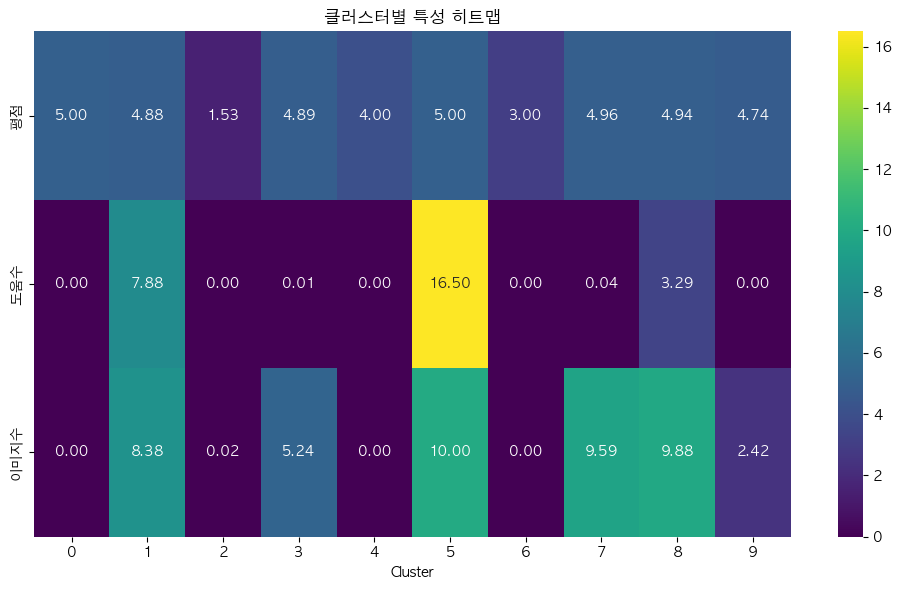

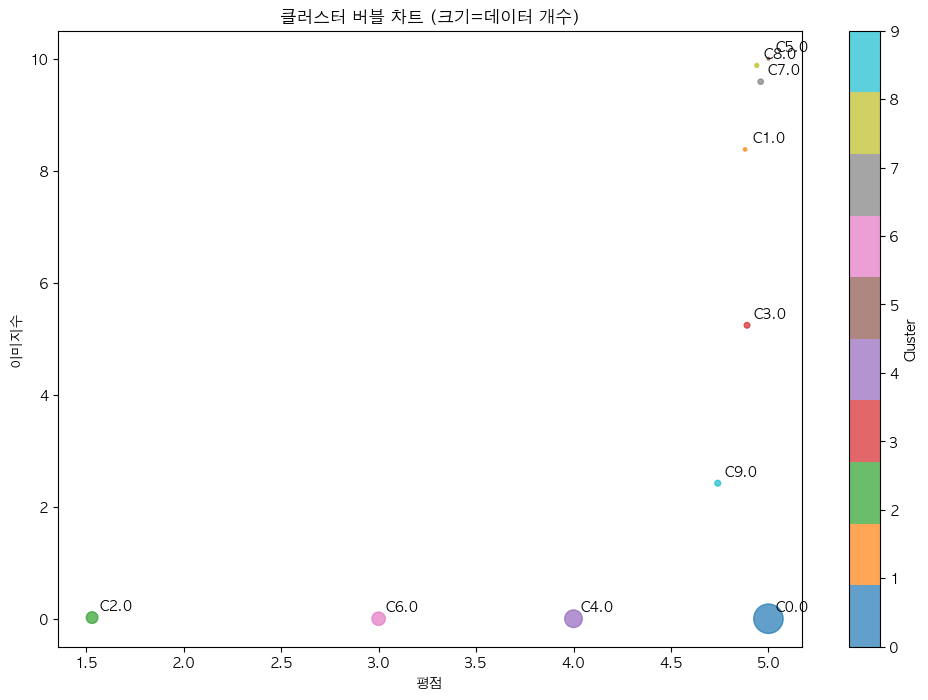

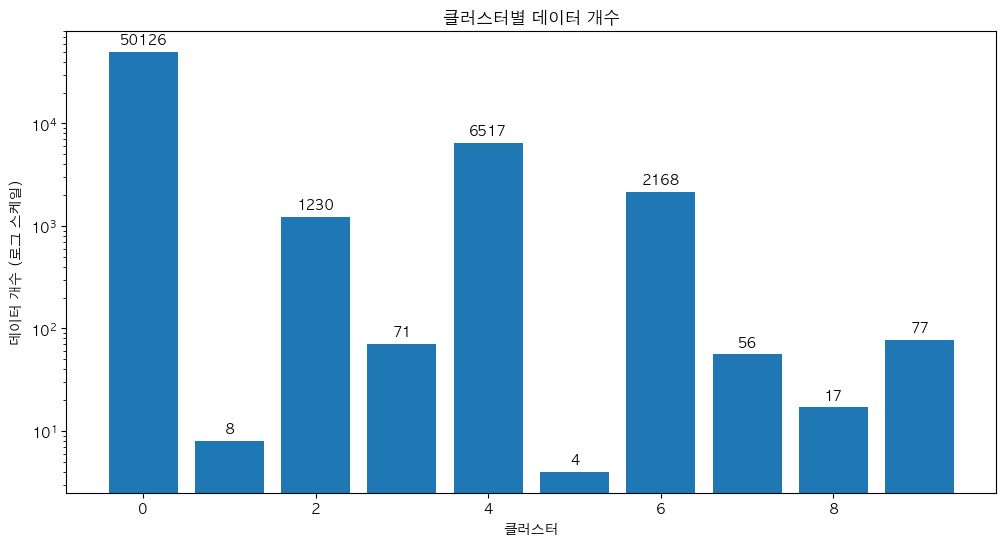

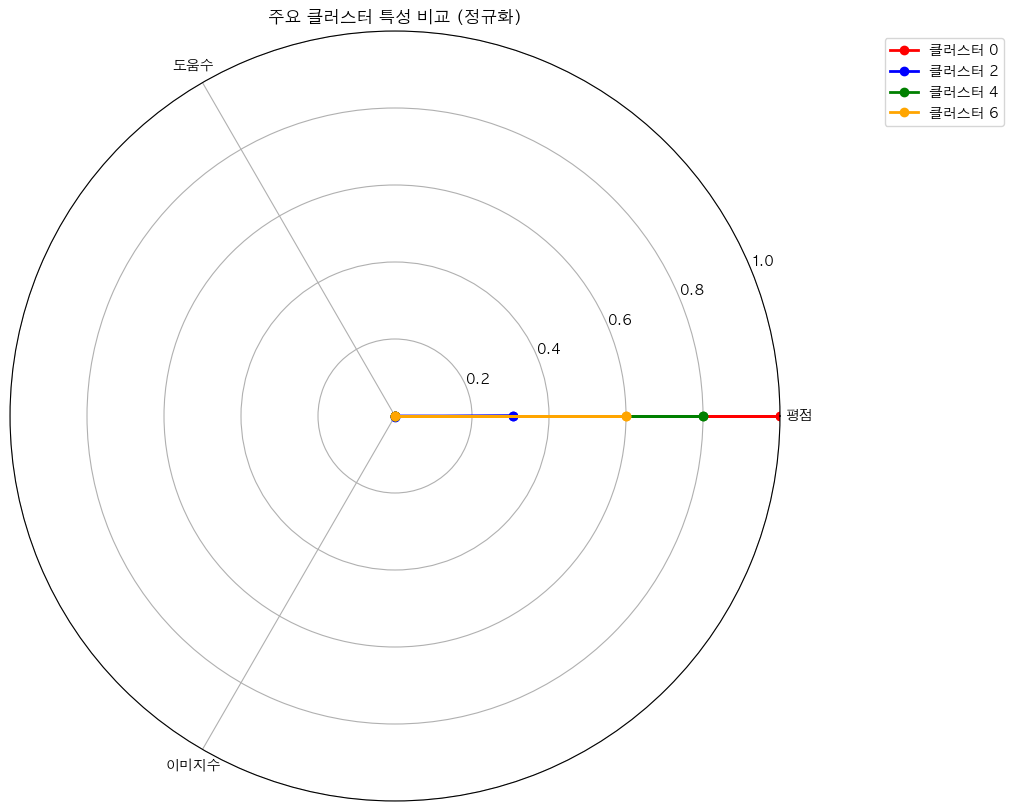

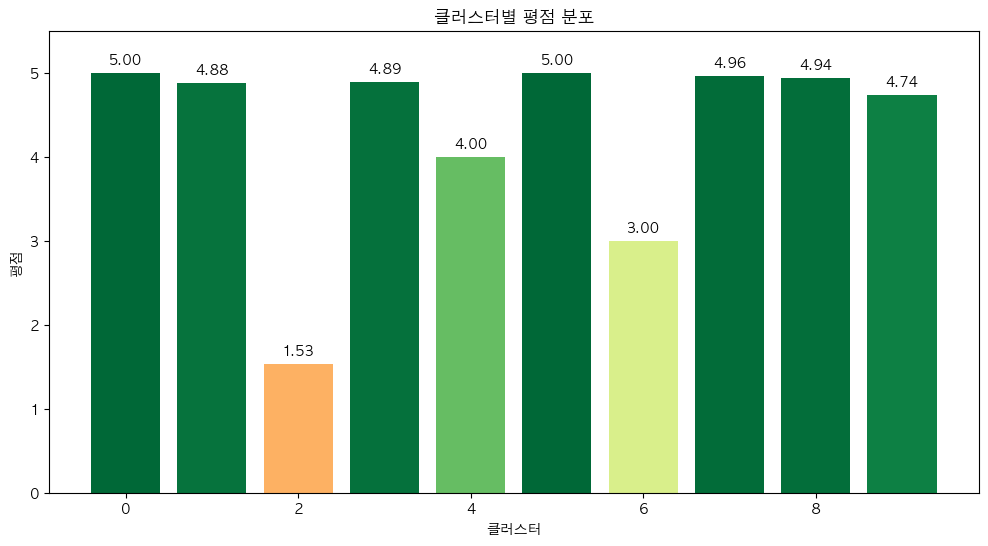

모든 시각화 완료: img/ 디렉토리


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

plt.rcParams['font.family'] = 'AppleGothic'
os.makedirs('img', exist_ok=True)

# 클러스터 데이터
cluster_data = {
    'Cluster': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    '평점': [5.00, 4.88, 1.53, 4.89, 4.00, 5.00, 3.00, 4.96, 4.94, 4.74],
    '도움수': [0.00, 7.88, 0.00, 0.01, 0.00, 16.50, 0.00, 0.04, 3.29, 0.00],
    '이미지수': [0.00, 8.38, 0.02, 5.24, 0.00, 10.00, 0.00, 9.59, 9.88, 2.42],
    '개수': [50126, 8, 1230, 71, 6517, 4, 2168, 56, 17, 77]
}
df_cluster = pd.DataFrame(cluster_data)

# 1. 히트맵
fig1, ax1 = plt.subplots(figsize=(10, 6))
heatmap_data = df_cluster.set_index('Cluster')[['평점', '도움수', '이미지수']].T
sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='viridis', ax=ax1)
plt.title('클러스터별 특성 히트맵')
plt.tight_layout()
plt.savefig('img/cluster_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. 버블 차트
fig2, ax2 = plt.subplots(figsize=(12, 8))
scatter = ax2.scatter(df_cluster['평점'], df_cluster['이미지수'],
                     s=np.sqrt(df_cluster['개수'])*2,
                     c=df_cluster['Cluster'], cmap='tab10', alpha=0.7)
for i, row in df_cluster.iterrows():
    ax2.annotate(f'C{row["Cluster"]}',
                (row['평점'], row['이미지수']),
                xytext=(5, 5), textcoords='offset points')
ax2.set_xlabel('평점')
ax2.set_ylabel('이미지수')
ax2.set_title('클러스터 버블 차트 (크기=데이터 개수)')
plt.colorbar(scatter, label='Cluster')
plt.savefig('img/cluster_bubble.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. 막대 그래프
fig3, ax3 = plt.subplots(figsize=(12, 6))
bars = ax3.bar(df_cluster['Cluster'], df_cluster['개수'])
ax3.set_yscale('log')
ax3.set_xlabel('클러스터')
ax3.set_ylabel('데이터 개수 (로그 스케일)')
ax3.set_title('클러스터별 데이터 개수')
for i, v in enumerate(df_cluster['개수']):
    ax3.text(i, v*1.1, str(v), ha='center', va='bottom')
plt.savefig('img/cluster_size_log.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. 레이더 차트
from math import pi

major_clusters = [0, 2, 4, 6]  # 큰 클러스터들
fig4, ax4 = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

categories = ['평점', '도움수', '이미지수']
N = len(categories)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

colors = ['red', 'blue', 'green', 'orange']
for i, cluster in enumerate(major_clusters):
    row = df_cluster[df_cluster['Cluster'] == cluster].iloc[0]
    values = [row['평점']/5, row['도움수']/17, row['이미지수']/10]  # 정규화
    values += values[:1]

    ax4.plot(angles, values, 'o-', linewidth=2,
             label=f'클러스터 {cluster}', color=colors[i])
    ax4.fill(angles, values, alpha=0.25, color=colors[i])

ax4.set_xticks(angles[:-1])
ax4.set_xticklabels(categories)
ax4.set_ylim(0, 1)
ax4.set_title('주요 클러스터 특성 비교 (정규화)')
ax4.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
plt.savefig('img/cluster_radar.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. 평점 분포
fig5, ax5 = plt.subplots(figsize=(12, 6))
bars = ax5.bar(df_cluster['Cluster'], df_cluster['평점'],
               color=plt.cm.RdYlGn(df_cluster['평점']/5))
ax5.set_xlabel('클러스터')
ax5.set_ylabel('평점')
ax5.set_title('클러스터별 평점 분포')
ax5.set_ylim(0, 5.5)
for i, v in enumerate(df_cluster['평점']):
    ax5.text(i, v+0.1, f'{v:.2f}', ha='center')
plt.savefig('img/cluster_rating.png', dpi=300, bbox_inches='tight')
plt.show()

print("모든 시각화 완료: img/ 디렉토리")